## Timing Comparison for Training Loops

In [1]:

import wandb
import config
import diamond_world_model_trainer as trainer
import incremental_training as incremental_trainer
import os

run = wandb.init(project="timing-comparison", reinit=True)


Imports successful.
Visualization helpers defined.
Training and validation epoch functions adapted for Batch object and Denoiser.forward.


wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: irvin-hwang (irvin-hwang-simulacra-systems) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


### Run `_main_training` on non-incremental dataset

--- Main Training Execution --- 
--- Configuration ---
Using device: cuda
Configuration loaded for _main_training.


Wandb initialized for _main_training.
--- Initializing Models for _main_training ---
Denoiser model created for _main_training. Total parameter count: 330,464,131
DiffusionSampler created for visualization in _main_training.
--- Setting up Optimizer and Scheduler for _main_training ---
Optimizer: AdamW with LR=0.0001
LR Scheduler: LambdaLR with 100 warmup steps.
Wandb watching denoiser model.
No checkpoint found or specified for _main_training. Starting fresh.
Loaded combined CSV with columns: ['session_id', 'image_path', 'timestamp', 'action']
Full dataset size: 591
Loading dataset split from C:\Projects\jetbot-diffusion-world-model-kong-finder-aux\output_model_2hz_DIAMOND_laundry_nonincremental_test\dataset_split.pth
Training dataset size: 531, Validation dataset size: 60
Preparing filtered validation subsets for visualization...
Filtering dataset with 60 samples for actions: [0.0]


Filtering Dataset:   0%|          | 0/60 [00:00<?, ?it/s]

Filtered down to 26 samples.
Filtering dataset with 60 samples for actions: [0.13]


Filtering Dataset:   0%|          | 0/60 [00:00<?, ?it/s]

Filtered down to 34 samples.
Found 26 stopped and 34 moving samples.
--- Starting Training Process in _main_training ---


Epoch 1 [Train]:   0%|          | 0/265 [00:00<?, ?it/s]

Batch 0 of size 3 took 4.552412800001548 seconds
Batch 1 of size 3 took 0.10369400000126916 seconds
Batch 2 of size 3 took 0.08127210000020568 seconds
Batch 3 of size 3 took 0.07708810000076483 seconds
Batch 4 of size 3 took 0.07753000000047905 seconds
Batch 5 of size 3 took 0.07440789999964181 seconds
Batch 6 of size 3 took 0.09325970000099915 seconds
Batch 7 of size 3 took 0.102656000000934 seconds
Batch 8 of size 3 took 0.08206620000055409 seconds
Batch 9 of size 3 took 0.07460939999873517 seconds
Batch 10 of size 3 took 0.10574970000016037 seconds
Batch 11 of size 3 took 0.07387139999991632 seconds
Batch 12 of size 3 took 0.07714810000106809 seconds
Batch 13 of size 3 took 0.09378800000013143 seconds
Batch 14 of size 3 took 0.07785420000072918 seconds
Batch 15 of size 3 took 0.0838463000000047 seconds
Batch 16 of size 3 took 0.07106920000114769 seconds
Batch 17 of size 3 took 0.07629000000088126 seconds
Batch 18 of size 3 took 0.07277020000037737 seconds
Batch 19 of size 3 took 0.0

Epoch 1 [Valid]:   0%|          | 0/30 [00:15<?, ?it/s]

Validation for epoch 1 took 32.10s
Epoch 1/1 - Train Loss: 0.7360 (MA: 0.7360), Val Loss: 0.7559 (MA: 0.7559), Duration: 0:01:24.197274
  Val Loss MA improved to 0.755875 from inf (nan% improvement).
  Saved new best model (val loss MA) at epoch 1
Epoch 1: Generating multiple visualization samples...
  Generating fixed sample (index 0 from val_dataset)...
  Generating random stopped sample...
  Generating random moving sample (action 0.13)...
Sampling for epoch 1 took 5.10s
Saved loss plot up to epoch 1
--- Training Complete (Stopped after epoch 1) ---
Total training duration: 0:01:54.619303
Final loss plot saved to C:\Projects\jetbot-diffusion-world-model-kong-finder-aux\output_model_2hz_DIAMOND_laundry_nonincremental_test\plots\denoiser_final_loss_plot.png


avg_train_loss,▁
avg_val_loss,▁
batch_idx,▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇████
epoch,▁
epoch_duration_sec,▁
learning_rate,▁
sampling_duration_sec,▁
step_duration,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_batch_denoising_loss,▃▃▁▇▆▅▄█▄▃▇▇▅▃▃▄▅▅▃▂▂▂▄▃▂▄▄
train_batch_loss,▃▃▁▇▆▅▄█▄▃▇▇▅▃▃▄▅▅▃▂▂▂▄▃▂▄▄
train_loss_ma,▁


Wandb run finished.


AttributeError: 'NoneType' object has no attribute 'history'

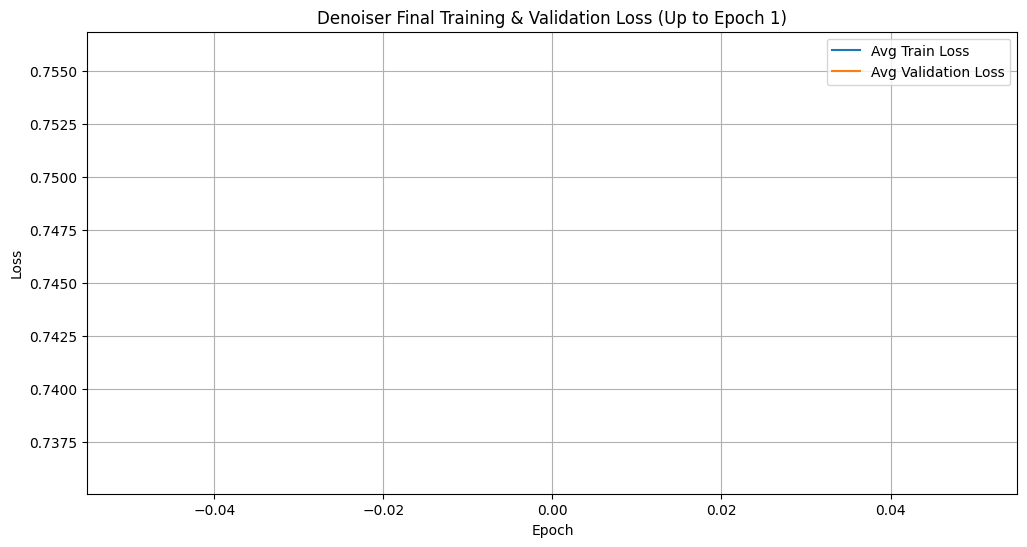

In [2]:
config.OUTPUT_DIR = os.path.join(config.AUXILIARY_DIR, 'output_model_2hz_DIAMOND_laundry_nonincremental_test')
config.DATA_DIR = os.path.join(config.AUXILIARY_DIR, 'jetbot_data_two_actions_nonincremental_test')
config.NUM_EPOCHS = 1
trainer_run = trainer._main_training(finish_run=False)
noninc_table = trainer_run.history[-1].get("train_epoch_perf")
wandb.finish()


### Run `train_diamond_model` on incremental dataset

In [ ]:
config.OUTPUT_DIR = os.path.join(config.AUXILIARY_DIR, 'output_model_2hz_DIAMOND_laundry_incremental_test')
config.DATA_DIR = os.path.join(config.AUXILIARY_DIR, 'jetbot_data_two_actions_incremental_test')
wandb.init(project="timing-comparison", reinit=True)

incremental_trainer.main()
inc_table = wandb.run.history[-1].get("incremental_perf")
wandb.finish()


### Compare timings

In [ ]:

import pandas as pd

if noninc_table is not None and inc_table is not None:
    df_non = pd.DataFrame(noninc_table.data, columns=noninc_table.columns)
    df_inc = pd.DataFrame(inc_table.data, columns=inc_table.columns)
    display(df_non.describe())
    display(df_inc.describe())
